/var/folders/sd/x6b24fj17sg_pd8tj67xfp4r0000gn/T/ipykernel_13092/4160838886.py:71: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  all_data.fillna(method="ffill", inplace=True)


PCA reduced features from 35 to 10 components.
Running auto_arima to select best (p,d,q)...
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=4570.534, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=4404.523, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=4568.538, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=4325.121, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=4271.370, Time=0.11 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=4243.590, Time=0.17 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=4233.362, Time=0.20 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=4231.371, Time=0.05 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=4241.598, Time=0.03 sec
 ARIMA(5,2,1)(0,0,0)[0]    

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
 


Principal Component Impact on Prediction:
  Principal Component  Coefficient  Abs Coefficient  Explained Variance Ratio
9                PC10    20.743192        20.743192                  0.012687
3                 PC4    -4.180309         4.180309                  0.076218
1                 PC2     2.278927         2.278927                  0.194502
0                 PC1     2.009511         2.009511                  0.380691
2                 PC3    -1.075862         1.075862                  0.141651
4                 PC5    -1.020464         1.020464                  0.053108
5                 PC6    -0.899120         0.899120                  0.043332
6                 PC7    -0.681839         0.681839                  0.026646
7                 PC8    -0.423857         0.423857                  0.019210
8                 PC9    -0.189637         0.189637                  0.014293

Model Evaluation:
R²: 0.6738
MAE: 2.7082
MSE: 10.3014
RMSE: 3.2096
AIC: 4032.63

✅ Results saved t

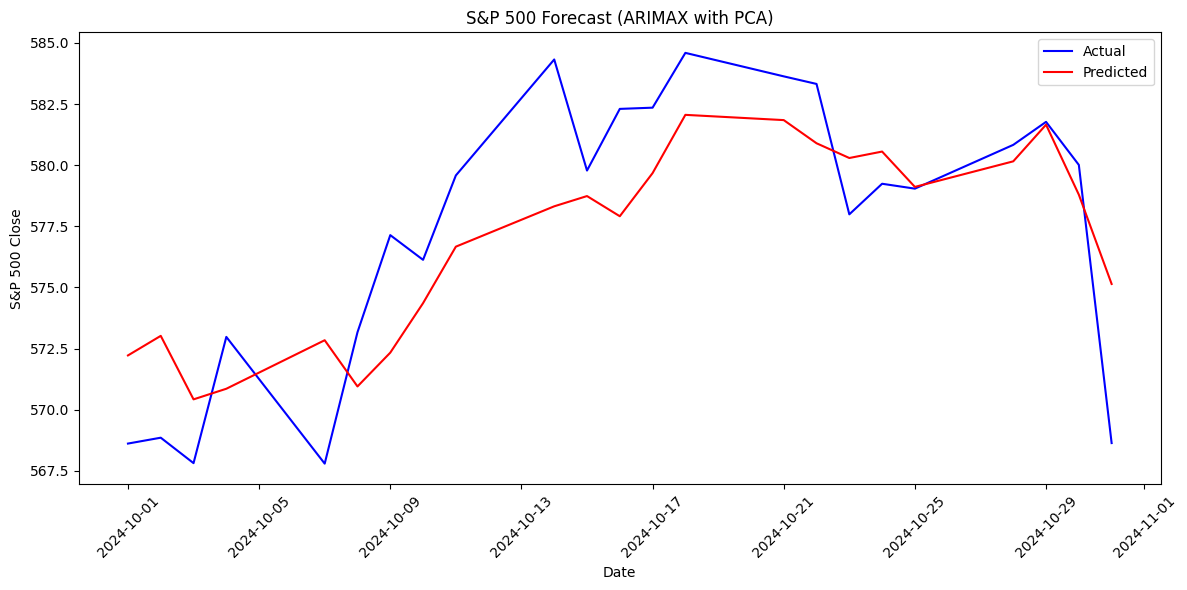

In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from pmdarima import auto_arima

# Load datasets
data_path = "data"
file_names = {
    "bitcoin": "bitcoin.csv",
    "gold": "gold.csv",
    "google_trends": "google_trends.csv",
    "sp500": "sp500.csv",
    "treasury_3m": "treasury_3m.csv",
    "treasury_10y": "treasury_10y.csv",
    "copper": "copper.csv",
    "oil": "oil.csv",
    "unemployment": "unemployment.csv",
    "moex": "MOEX.csv",
    "sse": "SSE.csv",
    "stoxx": "STOXX_600.csv"
}

data = {}
for key, file in file_names.items():
    file_path = os.path.join(data_path, file)
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        if "timestamp" not in df.columns:
            continue
        df["timestamp"] = pd.to_datetime(df["timestamp"])
        df.replace({'.': np.nan}, inplace=True)
        for col in df.columns:
            if col != "timestamp":
                df[col] = pd.to_numeric(df[col], errors='coerce')
        data[key] = df

# Rename columns (standardized)
rename_map = {
    "bitcoin": {"Close": "bitcoin_close", "Open": "bitcoin_open", "High": "bitcoin_high", "Low": "bitcoin_low", "Volume": "bitcoin_volume"},
    "gold": {"Close": "gold_close", "Open": "gold_open", "High": "gold_high", "Low": "gold_low", "Volume": "gold_volume"},
    "oil": {"Close": "oil_close", "Open": "oil_open", "High": "oil_high", "Low": "oil_low", "Volume": "oil_volume"},
    "copper": {"price": "copper_price"},
    "google_trends": {"SPX": "google_spx", "ETF": "google_etf", "index fund": "google_index_fund", "sp500": "google_sp500"},
    "unemployment": {"Unemployment": "unemployment_rate"},
    "treasury_3m": {"Close": "treasury_3m"},
    "treasury_10y": {"Close": "treasury_10y"},
    "sp500": {"Close": "sp500_close"},
    "moex": {"Close": "moex_close"},
    "sse": {"Close": "sse_close"},
    "stoxx": {"Close": "stoxx_close"}
}

for key, renames in rename_map.items():
    if key in data:
        data[key] = data[key].rename(columns=renames)

# Merge all datasets on timestamp
sp500 = data["sp500"]
all_data = sp500[["timestamp", "sp500_close"]]
for key, df in data.items():
    if key != "sp500":
        all_data = all_data.merge(df, on="timestamp", how="left")

# Clean and prepare
all_data.sort_values("timestamp", inplace=True)
all_data.fillna(method="ffill", inplace=True)
all_data.dropna(inplace=True)
all_data = all_data.loc[:, all_data.nunique() > 1]

# Define target and features
target = "sp500_close"
exclude_cols = ["timestamp", target]
exog_vars = [col for col in all_data.columns if col not in exclude_cols]

# Train/test split
split_date = pd.Timestamp("2025-01-01")

train = all_data[all_data["timestamp"] < split_date]
test = all_data[all_data["timestamp"] >= split_date]

y_train = train[target]
y_test = test[target]
X_train = train[exog_vars]
X_test = test[exog_vars]

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print(f"PCA reduced features from {X_train.shape[1]} to {X_train_pca.shape[1]} components.")

# Auto ARIMA to select best order
print("Running auto_arima to select best (p,d,q)...")
auto_model = auto_arima(
    y_train,
    exogenous=X_train_pca,
    start_p=1, start_q=1,
    max_p=5, max_q=5,
    d=None,
    seasonal=False,
    stepwise=True,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    maxiter=500
)
order = auto_model.order
print(f"Best ARIMA order: {order}")

# Fit ARIMAX
model = SARIMAX(y_train, exog=X_train_pca, order=order,
                enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=False)

# Forecast
forecast = model_fit.forecast(steps=len(X_test_pca), exog=X_test_pca)

# PCA Component Impact on Prediction
pca_coefficients = model_fit.params[-X_train_pca.shape[1]:]

component_impact = pd.DataFrame({
    "Principal Component": [f"PC{i+1}" for i in range(X_train_pca.shape[1])],
    "Coefficient": pca_coefficients.values,
    "Abs Coefficient": np.abs(pca_coefficients.values),
    "Explained Variance Ratio": pca.explained_variance_ratio_
}).sort_values(by="Abs Coefficient", ascending=False)

print("\nPrincipal Component Impact on Prediction:")
print(component_impact.head(10))  # Top 10 most impactful components

# Evaluate
r2 = r2_score(y_test, forecast)
mae = mean_absolute_error(y_test, forecast)
mse = mean_squared_error(y_test, forecast)
rmse = np.sqrt(mse)

print("\nModel Evaluation:")
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"AIC: {model_fit.aic:.2f}")

# Save results
os.makedirs("results", exist_ok=True)
pred_df = pd.DataFrame({
    "timestamp": test["timestamp"].values,
    "actual": y_test.values,
    "predicted": forecast
})
pred_df.to_csv("results/ARIMAX_predictions_with_PCA.csv", index=False)
print("\n✅ Results saved to: results/ARIMAX_predictions_with_PCA.csv")

# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(test["timestamp"], y_test, label="Actual", color='blue')
plt.plot(test["timestamp"], forecast, label="Predicted", color='red')
plt.title("S&P 500 Forecast (ARIMAX with PCA)")
plt.xlabel("Date")
plt.ylabel("S&P 500 Close")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [4]:
import os
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# Load datasets
data_path = "data"
file_names = {
    "bitcoin": "bitcoin.csv",
    "gold": "gold.csv",
    "google_trends": "google_trends.csv",
    "sp500": "sp500.csv",
    "treasury_3m": "treasury_3m.csv",
    "treasury_10y": "treasury_10y.csv",
    "copper": "copper.csv",
    "oil": "oil.csv",
    "unemployment": "unemployment.csv",
    "moex": "MOEX.csv",
    "sse": "SSE.csv",
    "stoxx": "STOXX_600.csv"
}

data = {}
for key, file in file_names.items():
    file_path = os.path.join(data_path, file)
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        if "timestamp" not in df.columns:
            continue
        df["timestamp"] = pd.to_datetime(df["timestamp"])
        df.replace({'.': np.nan}, inplace=True)
        for col in df.columns:
            if col != "timestamp":
                df[col] = pd.to_numeric(df[col], errors='coerce')
        data[key] = df

# Rename columns
rename_map = {
    "bitcoin": {"Close": "bitcoin_close", "Open": "bitcoin_open", "High": "bitcoin_high", "Low": "bitcoin_low", "Volume": "bitcoin_volume"},
    "gold": {"Close": "gold_close", "Open": "gold_open", "High": "gold_high", "Low": "gold_low", "Volume": "gold_volume"},
    "oil": {"Close": "oil_close", "Open": "oil_open", "High": "oil_high", "Low": "oil_low", "Volume": "oil_volume"},
    "copper": {"price": "copper_price"},
    "google_trends": {"SPX": "google_spx", "ETF": "google_etf", "index fund": "google_index_fund", "sp500": "google_sp500"},
    "unemployment": {"Unemployment": "unemployment_rate"},
    "treasury_3m": {"Close": "treasury_3m"},
    "treasury_10y": {"Close": "treasury_10y"},
    "sp500": {"Close": "sp500_close"},
    "moex": {"Close": "moex_close"},
    "sse": {"Close": "sse_close"},
    "stoxx": {"Close": "stoxx_close"}
}

for key, renames in rename_map.items():
    if key in data:
        data[key] = data[key].rename(columns=renames)

# Merge and clean data
sp500 = data["sp500"]
all_data = sp500[["timestamp", "sp500_close"]]
for key, df in data.items():
    if key != "sp500":
        all_data = all_data.merge(df, on="timestamp", how="left")

all_data.sort_values("timestamp", inplace=True)
all_data.fillna(method="ffill", inplace=True)
all_data.dropna(inplace=True)
all_data = all_data.loc[:, all_data.nunique() > 1]

# Define target and features
target = "sp500_close"
exclude_cols = ["timestamp", target]
exog_vars = [col for col in all_data.columns if col not in exclude_cols]

# Monthly SARIMAX backtest with reduced grid
results = []
start_date = pd.Timestamp("2023-01-01")
end_date = pd.Timestamp("2025-03-01")
current_date = start_date

while current_date <= end_date:
    next_month = current_date + pd.DateOffset(months=1)

    train = all_data[all_data["timestamp"] < current_date]
    test = all_data[(all_data["timestamp"] >= current_date) & (all_data["timestamp"] < next_month)]

    if len(train) < 100 or len(test) < 10:
        current_date += pd.DateOffset(months=1)
        continue

    y_train = train[target]
    y_test = test[target]
    X_train = train[exog_vars]
    X_test = test[exog_vars]

    # Standardize and apply PCA
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pca = PCA(n_components=0.95)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # SARIMAX parameter tuning with reduced grid
    best_aic = np.inf
    best_model = None
    best_order = None
    best_seasonal_order = None

    for p in [0, 1]:
        for q in [0, 1]:
            for P in [0, 1]:
                for Q in [0, 1]:
                    try:
                        model = SARIMAX(
                            y_train,
                            exog=X_train_pca,
                            order=(p, 1, q),
                            seasonal_order=(P, 0, Q, 12),
                            enforce_stationarity=False,
                            enforce_invertibility=False
                        )
                        model_fit = model.fit(disp=False)
                        if model_fit.aic < best_aic:
                            best_aic = model_fit.aic
                            best_model = model_fit
                            best_order = (p, 1, q)
                            best_seasonal_order = (P, 0, Q, 12)
                    except:
                        continue

    if best_model:
        forecast = best_model.forecast(steps=len(X_test_pca), exog=X_test_pca)
        r2 = r2_score(y_test, forecast)
        mae = mean_absolute_error(y_test, forecast)
        rmse = np.sqrt(mean_squared_error(y_test, forecast))

        results.append({
            "Backtest": len(results) + 1,
            "Train Size": len(train),
            "Test Start": current_date.strftime("%Y-%m-%d"),
            "R2": r2,
            "MAE": mae,
            "RMSE": rmse,
            "Order": best_order,
            "Seasonal Order": best_seasonal_order,
            "AIC": best_aic
        })

    current_date += pd.DateOffset(months=1)

# Save and print results
results_df = pd.DataFrame(results)
os.makedirs("results", exist_ok=True)
results_df.to_csv("results/sarimax_backtest_auto_reduced.csv", index=False)
print(results_df)


    Backtest  Train Size  Test Start         R2        MAE       RMSE  \
0          1         250  2023-01-01  -0.045939   6.734484   8.004150   
1          2         270  2023-02-01   0.029151   5.683735   6.523067   
2          3         289  2023-03-01   0.200825   4.096543   5.259078   
3          4         312  2023-04-01  -0.097120   2.698077   3.123156   
4          5         331  2023-05-01  -2.598731   6.599311   7.416520   
5          6         353  2023-06-01  -9.263276  16.673175  17.427094   
6          7         374  2023-07-01  -1.796024   9.241113  10.207363   
7          8         394  2023-08-01   0.074580   4.399575   5.216841   
8          9         417  2023-09-01   0.622938   4.295944   5.322653   
9         10         437  2023-10-01  -0.871566   7.435551  10.426330   
10        11         459  2023-11-01  -1.243227  14.301306  14.811485   
11        12         480  2023-12-01   0.589421   3.724542   4.783631   
12        13         500  2024-01-01  -2.508023  11